In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

# 1. Extract, Transform, Load (ETL)

In [4]:
# Load the dataset
data = pd.read_csv('SKYNEST_DATA_CW8 (1).csv', encoding='ISO-8859-1')

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

In [6]:
data.describe()

,Ref,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,3.202023,3.250250,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,29994.645522,37463.812252,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.329625,1.349607,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.774453
min,0.000000,1.000000,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
# Check for missing values
print(data.isnull().sum())

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness     

In [13]:
# Fill missing values with the median of the column
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


<ipython-input-13-960b0be530d9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


In [14]:
# Convert categorical variables to numeric (e.g., using LabelEncoder)
label_encoder = LabelEncoder()

In [15]:
# Encoding categorical variables
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Satisfied'] = label_encoder.fit_transform(data['Satisfied'])
data['Age Band'] = label_encoder.fit_transform(data['Age Band'])
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
data['Class'] = label_encoder.fit_transform(data['Class'])
data['Destination'] = label_encoder.fit_transform(data['Destination'])
data['Continent'] = label_encoder.fit_transform(data['Continent'])

# 2. Exploratory Data Analysis (EDA)

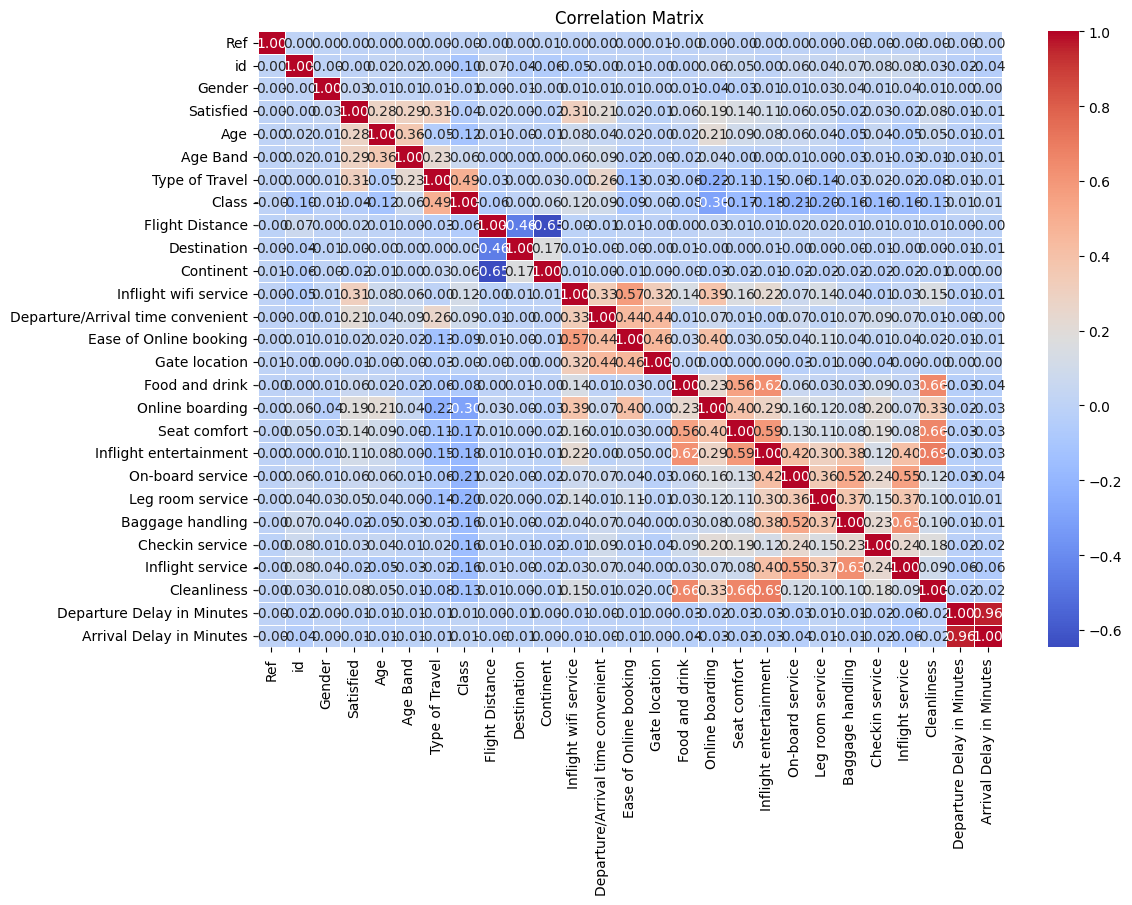

In [16]:
# Plot correlation matrix
plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

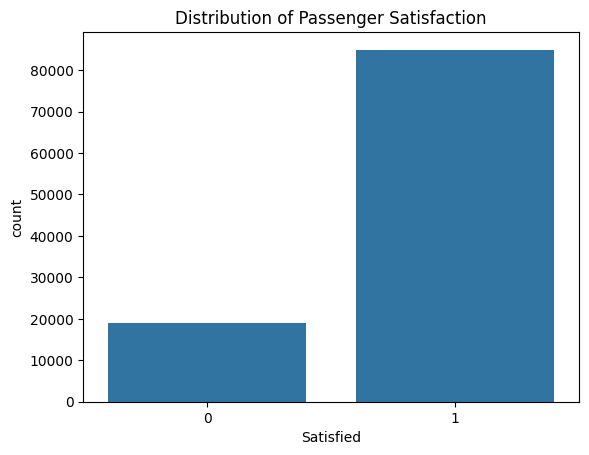

In [17]:
# Visualize distribution of Satisfaction variable
sns.countplot(x='Satisfied', data=data)
plt.title('Distribution of Passenger Satisfaction')
plt.show()

# 3. Machine Learning Models

In [18]:
# Split data into features (X) and target variable (y)
X = data.drop(columns=['Satisfied', 'Ref', 'id'])  # Drop the 'Satisfied', 'Ref', and 'id' columns
y = data['Satisfied']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Model 1: Logistic Regression

In [19]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 5. Model 2: Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 6. Model Evaluation

In [21]:
# Logistic Regression Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.8937490977335065
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      3775
           1       0.92      0.95      0.94     17006

    accuracy                           0.89     20781
   macro avg       0.83      0.79      0.81     20781
weighted avg       0.89      0.89      0.89     20781

Confusion Matrix for Logistic Regression:
 [[ 2397  1378]
 [  830 16176]]


In [22]:
# Random Forest Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, rf_pred))

Random Forest Accuracy: 0.9894134064770704
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3775
           1       0.99      1.00      0.99     17006

    accuracy                           0.99     20781
   macro avg       0.99      0.98      0.98     20781
weighted avg       0.99      0.99      0.99     20781

Confusion Matrix for Random Forest:
 [[ 3629   146]
 [   74 16932]]


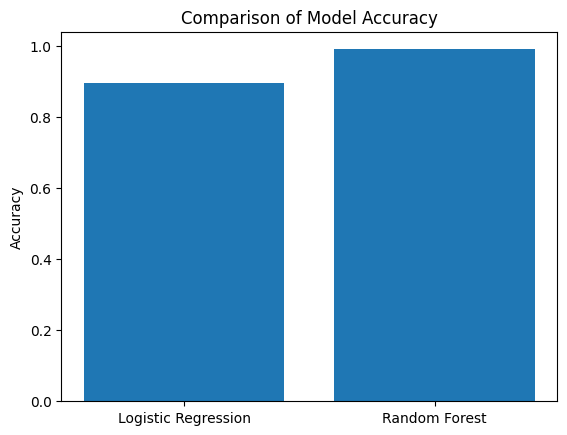

In [23]:
# Compare the models using accuracy
models = ['Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, log_reg_pred), accuracy_score(y_test, rf_pred)]
plt.bar(models, accuracy_scores)
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.show()